**Final Project CMSC6950 Fall 2025**


**Mona Hejazi**


 **201996350**
 

## **Introduction**
This project aims to analyze a dataset containing one year of weather records for Tehran, focusing on identifying extreme values in temperature and precipitation.

In this analysis, I worked with a weather dataset containing daily weather records for Tehran. The dataset includes several meteorological variables such as average temperature (`tavg`), minimum and maximum temperature (`tmin`, `tmax`), precipitation (`prcp`), snow, wind direction (`wdir`), wind speed (`wspd`), and atmospheric pressure (`pres`). My primary goal was to examine the dataset for missing values, compute summary statistics, and identify extreme or outlier values in key weather parameters using statistical methods.

#### **Dataset Overview**:
The dataset consists of 366 entries (one per day), covering a full year of daily weather data. There are 11 columns in total:

- `date`: Date of the weather record
- `tavg`: Average temperature (°C)
- `tmin`: Minimum temperature (°C)
- `tmax`: Maximum temperature (°C)
- `prcp`: Precipitation (mm)
- `snow`: Snowfall (cm) — with limited data
- `wdir`: Wind direction (degrees)
- `wspd`: Wind speed (m/s)
- `wpgt`: Wind gust (m/s) — with missing data
- `pres`: Atmospheric pressure (hPa)
- `tsun`: Sunshine duration (hours) — missing data

#### **Objectives**
1.	Analyze daily average, minimum, maximum temperatures, and precipitation over a year.
2.	Identify and visualize extreme temperature and precipitation values using statistical methods.
3.	Understand the implications of extreme weather events in Tehran.

#### **Data Overview**

The dataset includes daily records of the following parameters from 1 October 2023 to 30 September 2024:  Average Temperature (tag), Minimum Temperature (min), Maximum Temperature (tmax), and Precipitation (prep). 

#### **Source** :
 https://meteostat.net/en/place/ir/tehran?s=40754&t=2023-10-01/2024-09-30



C:\Users\bmehe\AppData\Local\Temp\ipykernel_83472\3076063663.py:22: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed in 3.10.
  with PdfPages(save_path) as pdf:


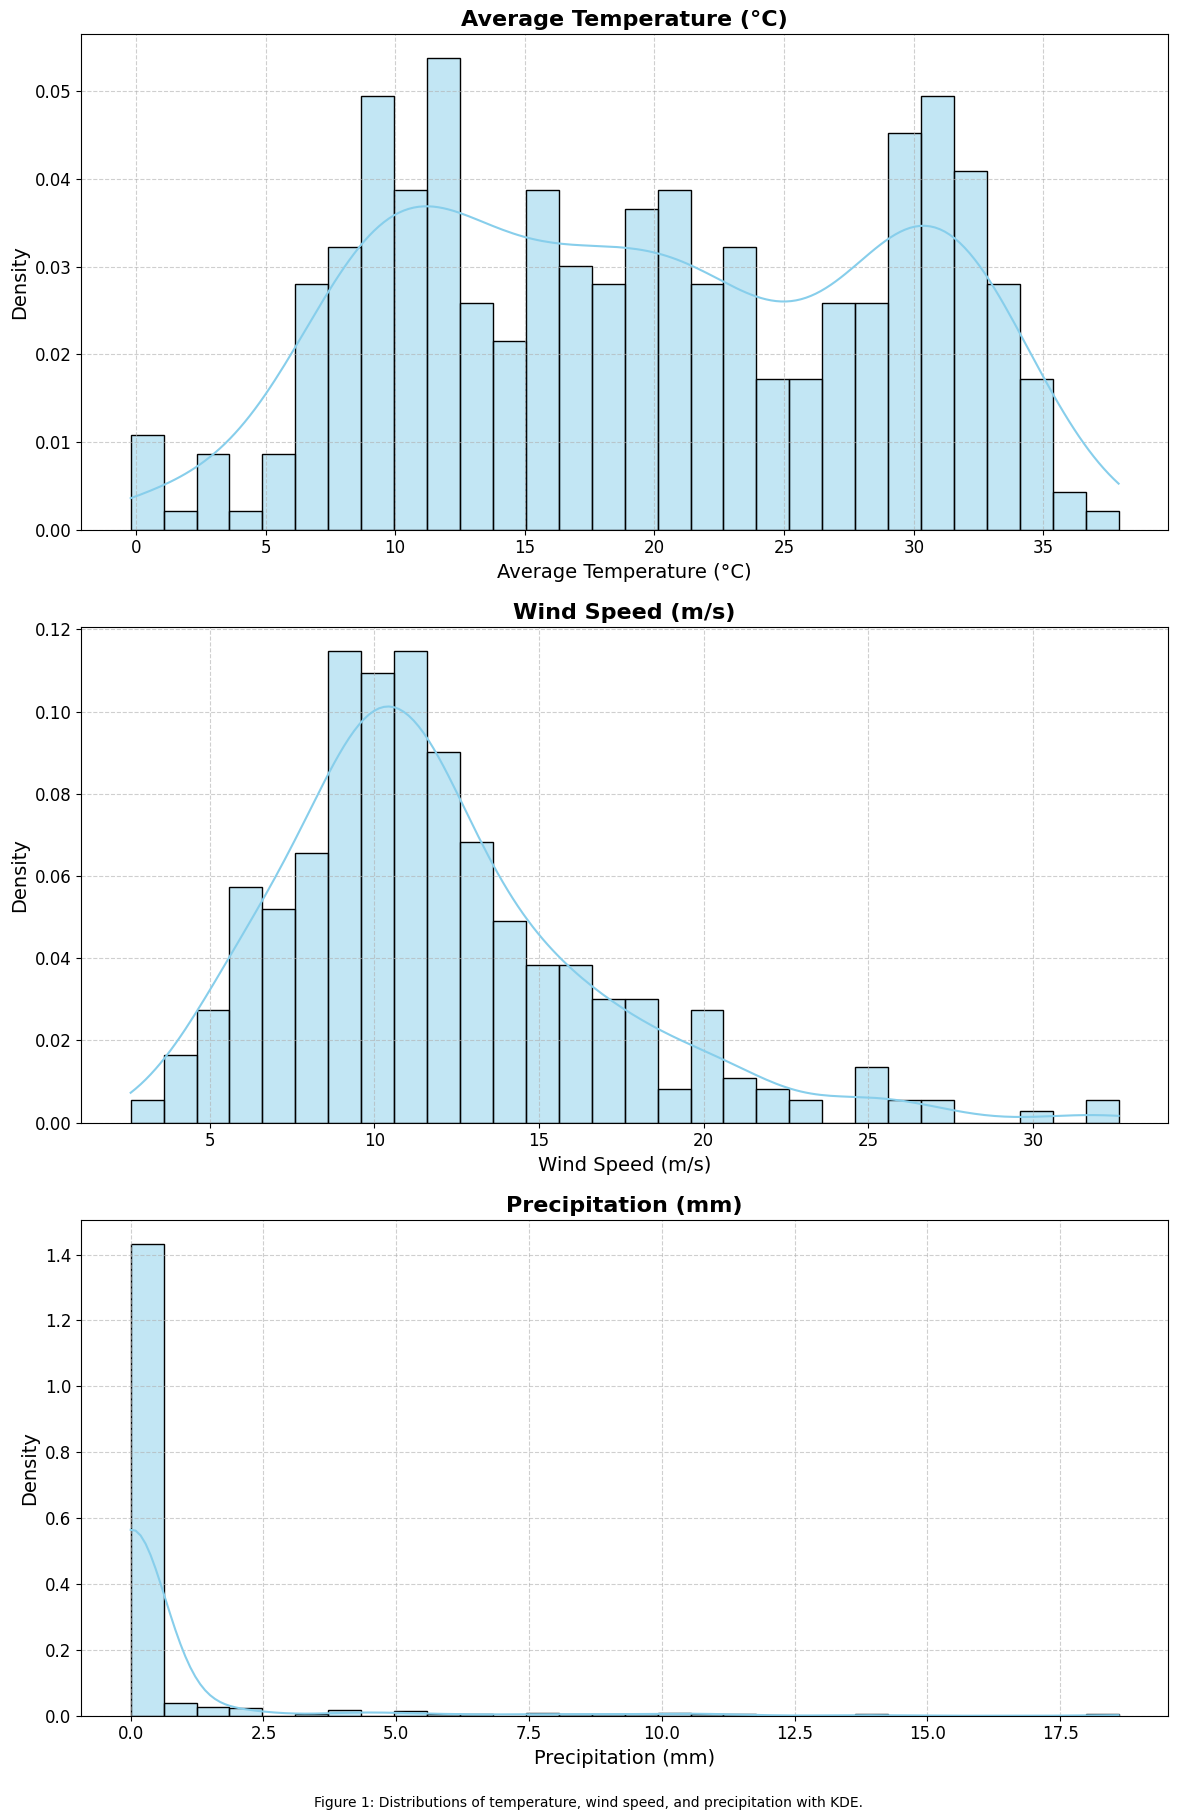


Statistical Analysis Table:
      Skewness  Kurtosis Shapiro-Wilk Test Stat Shapiro-Wilk P-value  \
tavg   0.00983  -1.15549               0.956811                  0.0   
wspd   1.18579  2.034058               0.927751                  0.0   
prcp  5.042631   28.8941                0.29523                  0.0   

     Normal Distribution  
tavg                  No  
wspd                  No  
prcp                  No  
Statistical analysis table saved at: E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950/Weather_Stats_Table.csv


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, skew, kurtosis
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

def load_and_prepare_data(file_path):
    """
    Load the Excel file and preprocess the data.
    - Converts the 'date' column to datetime.
    - Sets 'date' as the index.
    """
    data = pd.read_excel(file_path)
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    return data

def save_figure_with_caption(fig, caption, save_path):
    """
    Save a Matplotlib figure as a PDF with a caption.
    """
    with PdfPages(save_path) as pdf:
        pdf.savefig(fig, bbox_inches='tight')
        plt.figtext(0.5, -0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)
        pdf.close()

def analyze_distributions(data, columns, output_folder=None):
    """
    Analyze and visualize the distribution of specified data columns.
    - Plot histograms and KDEs for each column in subplots.
    - Calculate skewness, kurtosis, and normality test for each column.
    - Save the figure and table as files.
    """
    stats_results = {}
    num_columns = len(columns)
    
    # Prepare subplots
    fig, axs = plt.subplots(num_columns, 1, figsize=(12, 6 * num_columns), sharex=False)
    if num_columns == 1:
        axs = [axs]  # Ensure axs is iterable even for 1 subplot

    # Define descriptive titles for each column
    column_titles = {
        'tavg': 'Average Temperature (°C)',
        'prcp': 'Precipitation (mm)',
        'wspd': 'Wind Speed (m/s)'
    }

    for i, column in enumerate(columns):
        col_data = data[column].dropna()
        
        # Calculate skewness, kurtosis, and normality
        col_skewness = skew(col_data)
        col_kurtosis = kurtosis(col_data)
        shapiro_stat, shapiro_p = shapiro(col_data)
        normality = "Yes" if shapiro_p > 0.05 else "No"
        
        # Add results to table
        stats_results[column] = {
            "Skewness": col_skewness,
            "Kurtosis": col_kurtosis,
            "Shapiro-Wilk Test Stat": shapiro_stat,
            "Shapiro-Wilk P-value": shapiro_p,
            "Normal Distribution": normality
        }
        
        # Plot histogram and KDE
        sns.histplot(col_data, bins=30, kde=True, color='skyblue', edgecolor='black', stat="density", ax=axs[i])
        axs[i].set_title(column_titles[column], fontsize=16, fontweight='bold')  # Updated title
        axs[i].set_xlabel(column_titles[column], fontsize=14)
        axs[i].set_ylabel('Density', fontsize=14)
        axs[i].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    
    # Save the figure
    if output_folder:
        fig_path = f"{output_folder}/Weather_Distributions.pdf"
        caption = "Figure 1: Distributions of temperature, wind speed, and precipitation with KDE."
        save_figure_with_caption(fig, caption, fig_path)
    plt.show()
    
    # Save and print the table
    stats_table = pd.DataFrame(stats_results).T
    print("\nStatistical Analysis Table:")
    print(stats_table)
    
    if output_folder:
        table_path = f"{output_folder}/Weather_Stats_Table.csv"
        stats_table.to_csv(table_path)
        print(f"Statistical analysis table saved at: {table_path}")

# Specify the path of the Excel file and the output folder
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
output_folder = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950'

# Load and prepare data
data = load_and_prepare_data(file_path)

# Analyze the distributions of temperature, wind speed, and precipitation
columns_to_analyze = ['tavg', 'wspd', 'prcp']
analyze_distributions(data, columns=columns_to_analyze, output_folder=output_folder)



Plot saved as E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temp_extreme_Plot.pdf


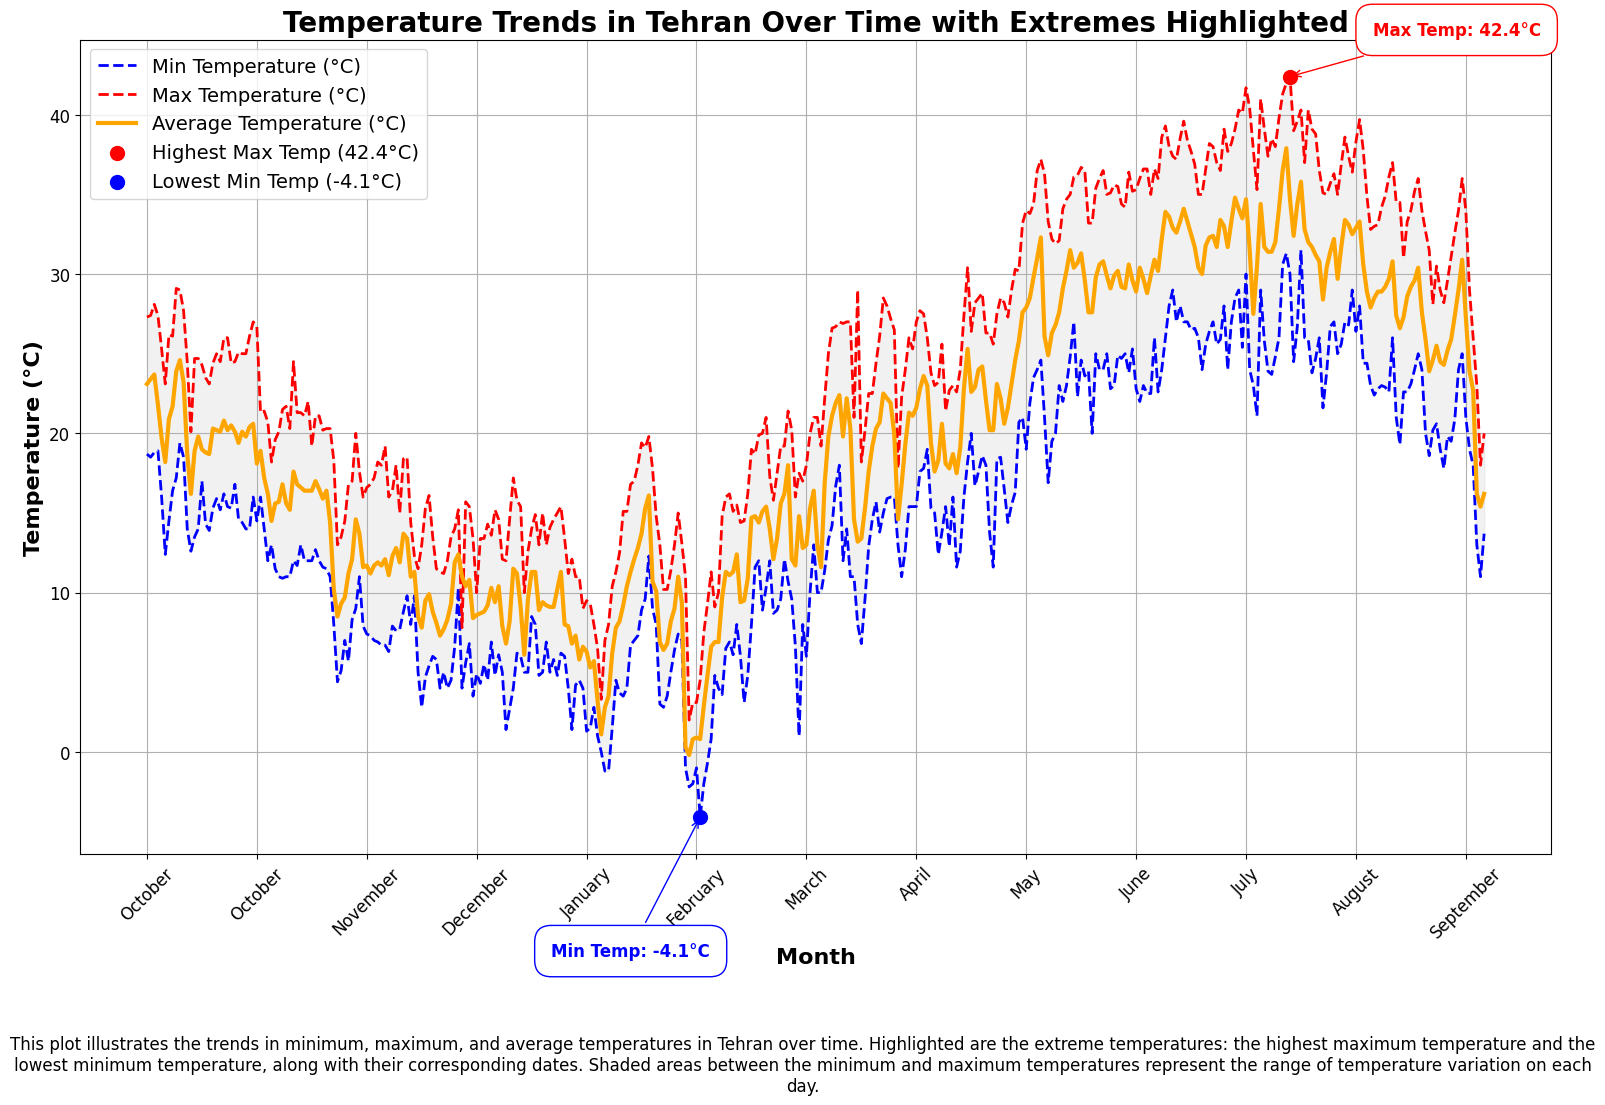

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    """
    Load the Excel file and preprocess the data.
    - Converts the 'date' column to datetime.
    - Sets 'date' as the index.
    
    Args:
        file_path (str): Path to the Excel file.
    
    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    data = pd.read_excel(file_path)
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    return data

def find_extreme_values(data):
    """
    Find the extreme temperatures and their corresponding dates.
    
    Args:
        data (pd.DataFrame): DataFrame with temperature data.
    
    Returns:
        tuple: (max_temp, max_temp_date, min_temp, min_temp_date)
    """
    max_temp = data['tmax'].max()
    max_temp_date = data['tmax'].idxmax()
    min_temp = data['tmin'].min()
    min_temp_date = data['tmin'].idxmin()
    return max_temp, max_temp_date, min_temp, min_temp_date

def plot_temperature_trends(data, max_temp, max_temp_date, min_temp, min_temp_date, save_path=None):
    """
    Plot temperature trends and highlight extreme values.
    
    Args:
        data (pd.DataFrame): DataFrame with temperature data.
        max_temp (float): Maximum temperature value.
        max_temp_date (pd.Timestamp): Date of maximum temperature.
        min_temp (float): Minimum temperature value.
        min_temp_date (pd.Timestamp): Date of minimum temperature.
        save_path (str, optional): Path to save the plot as a PDF.
    """
    plt.figure(figsize=(16, 10))
    plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 20,
        'axes.labelsize': 16,
        'legend.fontsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
    })

    # Plotting temperatures
    plt.plot(data.index, data['tmin'], label='Min Temperature (°C)', color='blue', linestyle='--', linewidth=2)
    plt.plot(data.index, data['tmax'], label='Max Temperature (°C)', color='red', linestyle='--', linewidth=2)
    plt.plot(data.index, data['tavg'], label='Average Temperature (°C)', color='orange', linewidth=3)
    plt.fill_between(data.index, data['tmin'], data['tmax'], color='lightgray', alpha=0.3)

    # Highlight extreme values
    plt.scatter(max_temp_date, max_temp, color='red', label=f'Highest Max Temp ({max_temp}°C)', s=100, zorder=5)
    plt.scatter(min_temp_date, min_temp, color='blue', label=f'Lowest Min Temp ({min_temp}°C)', s=100, zorder=5)

    # Annotating extreme values outside the plot with a box and arrow
    plt.annotate(
        f'Max Temp: {max_temp}°C', 
        (max_temp_date, max_temp), 
        textcoords="offset points", 
        xytext=(120, 30),  # Position outside the plot
        ha='center', 
        color='red', 
        fontsize=12, 
        fontweight='bold', 
        bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=1'),
        arrowprops=dict(arrowstyle="->", color='red')
    )
    plt.annotate(
        f'Min Temp: {min_temp}°C', 
        (min_temp_date, min_temp), 
        textcoords="offset points", 
        xytext=(-50, -100),  # Position outside the plot
        ha='center', 
        color='blue', 
        fontsize=12, 
        fontweight='bold', 
        bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=1'),
        arrowprops=dict(arrowstyle="->", color='blue')
    )

    # Adding labels, title, and legend
    plt.title('Temperature Trends in Tehran Over Time with Extremes Highlighted', fontweight='bold')
    plt.xlabel('Month', fontweight='bold')
    plt.ylabel('Temperature (°C)', fontweight='bold')
    plt.legend(loc='upper left')
    plt.grid()
    
    # Change x-axis to month names
    plt.xticks(ticks=data.index[::30], labels=data.index.month_name()[::30], rotation=45)

    # Adding a caption
    caption = (
        "This plot illustrates the trends in minimum, maximum, and average temperatures in Tehran over time. "
        "Highlighted are the extreme temperatures: the highest maximum temperature and the lowest minimum temperature, "
        "along with their corresponding dates. Shaded areas between the minimum and maximum temperatures "
        "represent the range of temperature variation on each day."
    )
    plt.figtext(
        0.5, -0.1, caption, 
        wrap=True, horizontalalignment='center', fontsize=12, color='black'
    )

    plt.tight_layout()

# Main script
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
data = load_and_prepare_data(file_path)
max_temp, max_temp_date, min_temp, min_temp_date = find_extreme_values(data)
save_path = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temp_extreme_Plot.pdf'

# Call the function to plot and save the figure
plot_temperature_trends(data, max_temp, max_temp_date, min_temp, min_temp_date, save_path)

# Save the plot as a PDF if a save_path is provided
if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Ensure caption is included
        print(f"Plot saved as {save_path}")
    
plt.show()

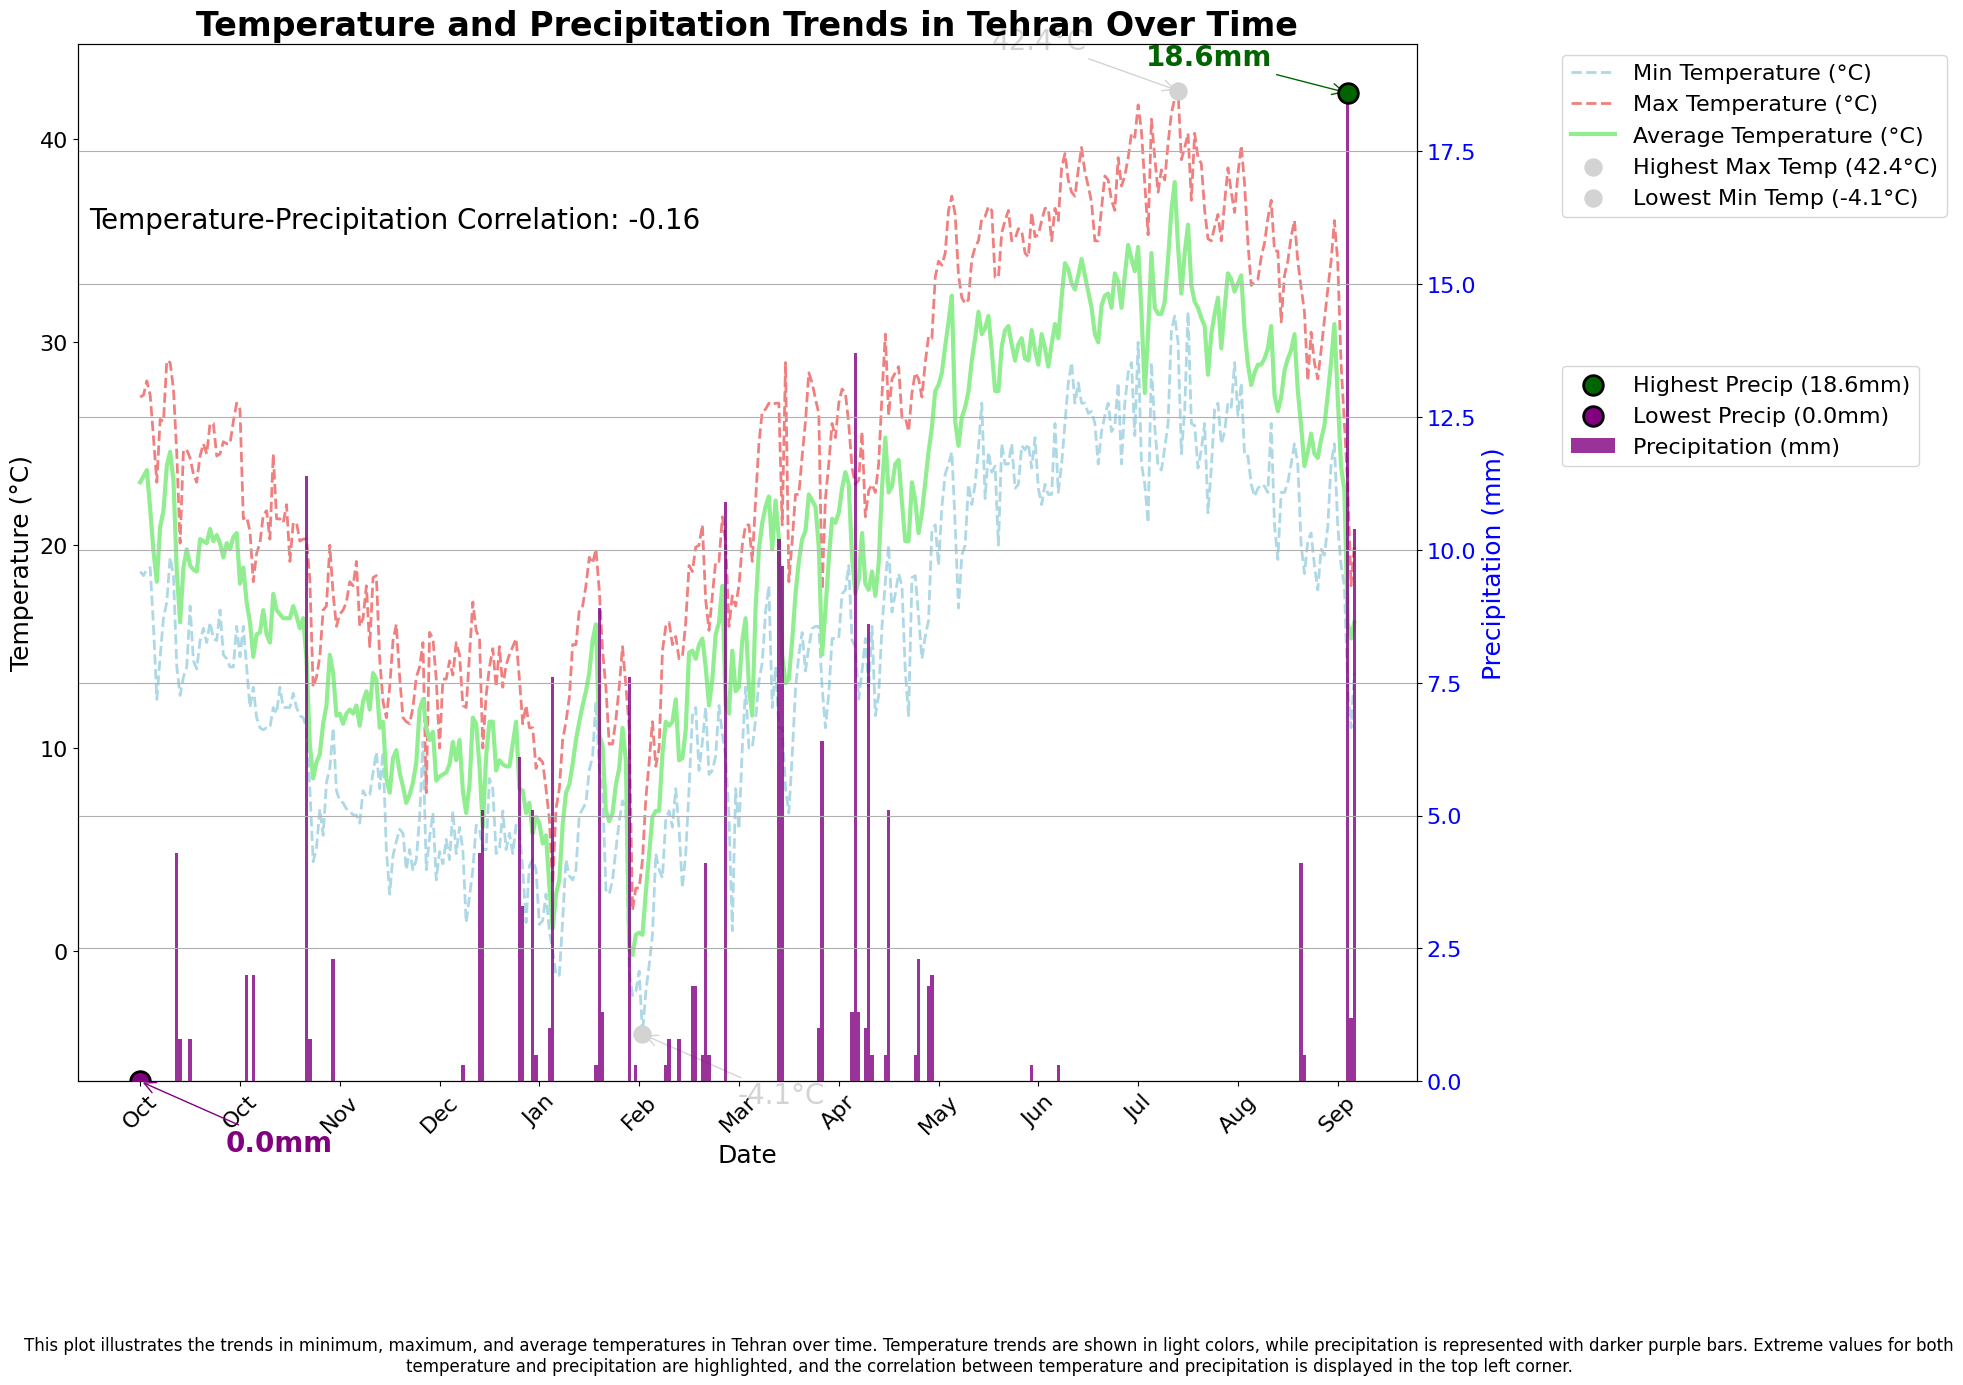

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    """
    Load the Excel file and preprocess the data.
    - Converts the 'date' column to datetime.
    - Sets 'date' as the index.
    
    Args:
        file_path (str): Path to the Excel file.
    
    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    data = pd.read_excel(file_path)
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    return data

def plot_temperature_and_precipitation(data, save_path=None):
    """
    Plot temperature trends (avg, min, max) and precipitation on the same graph.
    - Temperature will be in light colors.
    - Precipitation will be darker (dark purple) and with thicker bars.
    Also identifies and highlights extreme values (max/min temperature and precipitation).
    - Computes and displays the correlation between temperature and precipitation.
    
    Args:
        data (pd.DataFrame): DataFrame containing temperature and precipitation data.
        save_path (str): Optional path to save the figure as a PDF.
    """
    
    # Find extreme values (max/min for temperature and precipitation)
    max_temp = data['tmax'].max()
    max_temp_date = data['tmax'].idxmax()
    min_temp = data['tmin'].min()
    min_temp_date = data['tmin'].idxmin()
    
    max_precip = data['prcp'].max()
    max_precip_date = data['prcp'].idxmax()
    min_precip = data['prcp'].min()
    min_precip_date = data['prcp'].idxmin()
    
    # Calculate correlation between temperature and precipitation
    temp_precip_correlation = data[['tavg', 'prcp']].corr().iloc[0, 1]
    
    # Create the plot with a larger figure size
    fig, ax1 = plt.subplots(figsize=(20, 12))  # Bigger figure size
    
    # Plot temperature trends with light colors
    ax1.plot(data.index, data['tmin'], label='Min Temperature (°C)', color='lightblue', linestyle='--', linewidth=2)
    ax1.plot(data.index, data['tmax'], label='Max Temperature (°C)', color='lightcoral', linestyle='--', linewidth=2)
    ax1.plot(data.index, data['tavg'], label='Average Temperature (°C)', color='lightgreen', linewidth=3)
    ax1.set_xlabel('Date', fontsize=18)
    ax1.set_ylabel('Temperature (°C)', color='black', fontsize=18)
    ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
    
    # Create a second y-axis for precipitation with dark purple color and thicker bars
    ax2 = ax1.twinx()
    ax2.bar(data.index, data['prcp'], color='purple', alpha=0.8, width=1.0, label='Precipitation (mm)', linewidth=2)
    ax2.set_ylabel('Precipitation (mm)', color='blue', fontsize=18)
    ax2.tick_params(axis='y', labelcolor='blue', labelsize=16)
    
    # Highlight extreme values on the plot
    ax1.scatter(max_temp_date, max_temp, color='lightgray', label=f'Highest Max Temp ({max_temp}°C)', s=150, zorder=5)
    ax1.scatter(min_temp_date, min_temp, color='lightgray', label=f'Lowest Min Temp ({min_temp}°C)', s=150, zorder=5)
    ax2.scatter(max_precip_date, max_precip, color='darkgreen', label=f'Highest Precip ({max_precip}mm)', s=200, zorder=5, edgecolor='black', linewidth=2)
    ax2.scatter(min_precip_date, min_precip, color='purple', label=f'Lowest Precip ({min_precip}mm)', s=200, zorder=5, edgecolor='black', linewidth=2)

    # Annotate extreme values with bold text for precipitation and light color for temperature
    ax1.annotate(f'{max_temp}°C', (max_temp_date, max_temp), textcoords="offset points", xytext=(-100, 30), ha='center', color='lightgray', fontsize=20, fontweight='normal', arrowprops=dict(arrowstyle="->", color='lightgray'))
    ax1.annotate(f'{min_temp}°C', (min_temp_date, min_temp), textcoords="offset points", xytext=(100, -50), ha='center', color='lightgray', fontsize=20, fontweight='normal', arrowprops=dict(arrowstyle="->", color='lightgray'))
    ax2.annotate(f'{max_precip}mm', (max_precip_date, max_precip), textcoords="offset points", xytext=(-100, 20), ha='center', color='darkgreen', fontsize=20, fontweight='bold', arrowprops=dict(arrowstyle="->", color='darkgreen'))
    ax2.annotate(f'{min_precip}mm', (min_precip_date, min_precip), textcoords="offset points", xytext=(100, -50), ha='center', color='purple', fontsize=20, fontweight='bold', arrowprops=dict(arrowstyle="->", color='purple'))

    # Add title and grid
    plt.title('Temperature and Precipitation Trends in Tehran Over Time', fontsize=24, fontweight='bold')
    plt.grid(True)
    
    # Move the legends outside the plot further right
    ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=16)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.7), fontsize=16)

    # Format X-axis to show month names
    ax1.set_xticks(data.index[::int(len(data)/12)])  # Show 12 ticks, approximately one per month
    ax1.set_xticklabels(data.index.strftime('%b')[::int(len(data)/12)], rotation=45, fontsize=16)
    
    # Display correlation in the top-left of the plot
    plt.figtext(0.05, 0.8, f'Temperature-Precipitation Correlation: {temp_precip_correlation:.2f}', fontsize=20, color='black', ha='left')
    
      # Adding the caption to the figure
    caption = (
        "This plot illustrates the trends in minimum, maximum, and average temperatures in Tehran over time. "
        "Temperature trends are shown in light colors, while precipitation is represented with darker purple bars. "
        "Extreme values for both temperature and precipitation are highlighted, and the correlation between "
        "temperature and precipitation is displayed in the top left corner."
    )
    plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=12, color='black')
    
    # Adjust layout to fit everything properly
    plt.tight_layout()
    
    # Save the figure as a PDF if save_path is provided
    if save_path:
        plt.savefig(save_path, format='pdf')

    # Show the plot
    plt.show()

# Call the function to plot the combined temperature and precipitation data
save_path = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temp_Precip_Plot.pdf'  
plot_temperature_and_precipitation(data, save_path)


Correlation Scale:

1.0: Perfect positive correlation (as one increases, the other increases).

0.5: Moderate positive correlation.

0: No correlation (no predictable relationship).

-0.5: Moderate negative correlation.

-1.0: Perfect negative correlation (as one increases, the other decreases).

Since -0.16 is close to zero, it indicates that temperature and precipitation in Tehran don't have a strong linear relationship over the timeframe of the data, and any fluctuations in one aren't strongly associated with fluctuations in the other.

C:\Users\bmehe\AppData\Local\Temp\ipykernel_83472\1876220284.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_counts = data.groupby('month').apply(


           days_above  days_below  total_days  trend
month                                               
January             0           3           3  below
February            0           9           9  below
March               0           2           2  below
April               0           0           0  below
May                 0           0           0  below
June                0           0           0  below
July                9           0           9  above
August              7           0           7  above
September           0           0           0  below
October             0           0           0  below
November            0           0           0  below
December            0           0           0  below
Days above +1.5 SD: 16
Days below -1.5 SD: 14
Days within ±1.5 SD: 336
The majority of days are above the ±1.5 SD threshold.
Plot saved to E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temperature_Above_Below_Mean_Plot_with_1_5Std.pdf


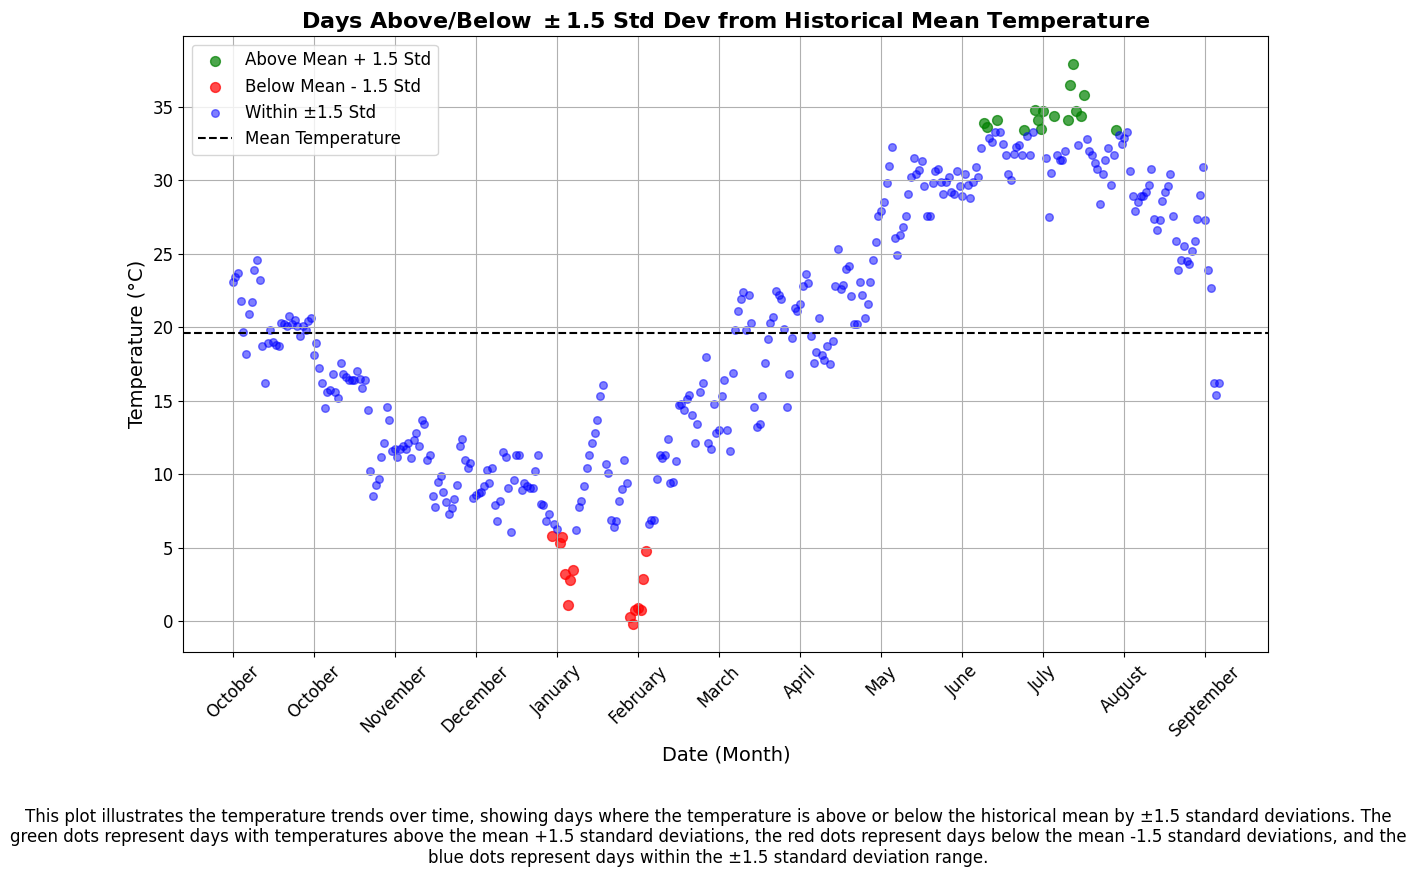

Table saved to E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temperature_Above_Below_Mean_Plot_with_1_5Std_Table.pdf
The majority of days are above the ±1.5 SD threshold.

Monthly Trends:
           days_above  days_below  total_days  trend
month                                               
January             0           3           3  below
February            0           9           9  below
March               0           2           2  below
April               0           0           0  below
May                 0           0           0  below
June                0           0           0  below
July                9           0           9  above
August              7           0           7  above
September           0           0           0  below
October             0           0           0  below
November            0           0           0  below
December            0           0           0  below


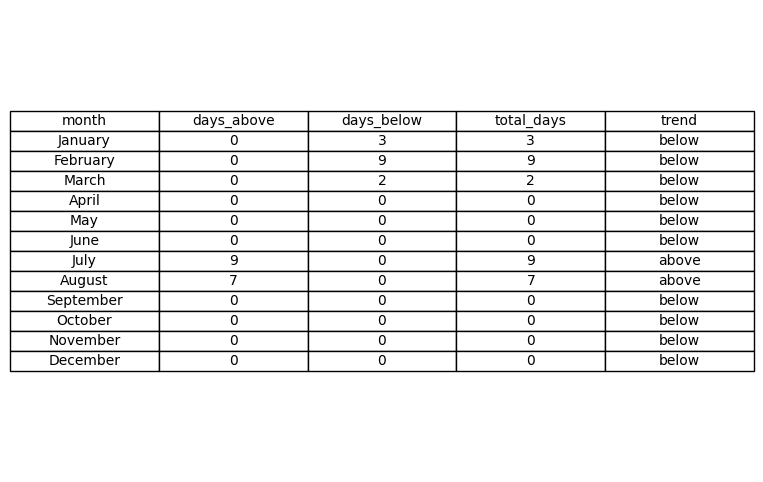

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_temperature_and_check_majority(data, temp_column='tavg', save_path=None):
    """
    Plot days where the temperature is above or below the historical mean by ±1.5 standard deviations,
    determine if the majority of days are above or below the mean ±1.5 SD, and analyze trends by month.
    Also saves the results in a nice table format in a PDF.

    Args:
        data (pd.DataFrame): DataFrame containing temperature data.
        temp_column (str): Column to calculate the mean temperature (default 'tavg').
        save_path (str): Optional path to save the figure as a PDF.
    
    Returns:
        str: A summary of the majority trend and monthly breakdown.
    """
    # Ensure the temperature column exists
    if temp_column not in data.columns:
        raise ValueError(f"The specified temperature column '{temp_column}' does not exist in the DataFrame.")

    # Calculate the historical mean and standard deviation
    historical_mean = data[temp_column].mean()
    historical_std = data[temp_column].std()
    
    # Define thresholds for ±1.5 SD
    upper_threshold = historical_mean + 1.5 * historical_std
    lower_threshold = historical_mean - 1.5 * historical_std

    # Create masks for categories
    above_significant = data[temp_column] > upper_threshold
    below_significant = data[temp_column] < lower_threshold
    normal = ~above_significant & ~below_significant  # Days within ±1.5 std deviation

    # Add month information
    data['month'] = data.index.month
    data['month_name'] = data.index.month_name()

    # Count days by month
    monthly_counts = data.groupby('month').apply(
        lambda x: pd.Series({
            'days_above': (x[temp_column] > upper_threshold).sum(),
            'days_below': (x[temp_column] < lower_threshold).sum(),
        })
    )
    monthly_counts['total_days'] = monthly_counts['days_above'] + monthly_counts['days_below']
    monthly_counts['trend'] = monthly_counts.apply(
        lambda x: 'above' if x['days_above'] > x['days_below'] else 'below', axis=1
    )

    # Print monthly trends with month names
    monthly_counts.index = monthly_counts.index.map(lambda x: pd.to_datetime(f'2024-{x:02d}-01').strftime('%B'))  # Convert month numbers to names
    print(monthly_counts)

    # Determine majority category overall
    count_above = above_significant.sum()
    count_below = below_significant.sum()
    count_normal = normal.sum()
    majority = "above" if count_above > count_below else "below" if count_below > count_above else "equal"

    print(f"Days above +1.5 SD: {count_above}")
    print(f"Days below -1.5 SD: {count_below}")
    print(f"Days within ±1.5 SD: {count_normal}")
    print(f"The majority of days are {majority} the ±1.5 SD threshold.")

    # Plot the results
    plt.figure(figsize=(14, 8))
    plt.scatter(data.index[above_significant], data[temp_column][above_significant], 
                color='green', label='Above Mean + 1.5 Std', alpha=0.7, s=50)
    plt.scatter(data.index[below_significant], data[temp_column][below_significant], 
                color='red', label='Below Mean - 1.5 Std', alpha=0.7, s=50)
    plt.scatter(data.index[normal], data[temp_column][normal], 
                color='blue', label='Within ±1.5 Std', alpha=0.5, s=30)
    plt.axhline(y=historical_mean, color='black', linestyle='--', label='Mean Temperature', linewidth=1.5)
    plt.title(r"$\mathbf{Days\ Above/Below\ \pm1.5\ Std\ Dev\ from\ Historical\ Mean\ Temperature}$", fontsize=16)
    plt.xlabel('Date (Month)', fontsize=14)
    plt.ylabel('Temperature (°C)', fontsize=14)

    # Set x-axis as month names
    plt.xticks(data.index[::30], data['month_name'][::30], rotation=45)  # Adjust ticks for clarity

    plt.legend(loc='best', fontsize=12)
    plt.grid(True)

  # Add a caption to the plot
    caption = (
        "This plot illustrates the temperature trends over time, showing days where the temperature is "
        "above or below the historical mean by ±1.5 standard deviations. The green dots represent days with "
        "temperatures above the mean +1.5 standard deviations, the red dots represent days below the mean -1.5 "
        "standard deviations, and the blue dots represent days within the ±1.5 standard deviation range."
    )
    plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=12, color='black')

    # Save the plot as a PDF if save_path is provided
    if save_path:
        plt.savefig(save_path, format='pdf')
        print(f"Plot saved to {save_path}")

    # Show the plot
    plt.show()

    # Create and save the results as a table
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a new figure for the table
    ax.axis('off')  # Hide the axis

    # Convert the DataFrame to a table and style it
    table_data = monthly_counts.reset_index()
    table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Adjust the table size

    # Save the table as a PDF
    table_pdf_path = save_path.replace(".pdf", "_Table.pdf")
    plt.savefig(table_pdf_path, format='pdf')
    print(f"Table saved to {table_pdf_path}")

    # Return the majority result and monthly breakdown
    return f"The majority of days are {majority} the ±1.5 SD threshold.\n\nMonthly Trends:\n{monthly_counts}"

# Example usage
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
data['date'] = pd.to_datetime(data['date'])  # Convert the date column to datetime format
data.set_index('date', inplace=True)

# Call the function
save_path = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temperature_Above_Below_Mean_Plot_with_1_5Std.pdf'
result = plot_temperature_and_check_majority(data, temp_column='tavg', save_path=save_path)
print(result)



### **Data Processing and Outlier Detection in Tehran Weather Data**


#### **Data Inspection and Missing Values:**
I began by inspecting the structure of the dataset to understand its contents and identify any missing values. Upon inspection, I found that some columns, such as `snow`, `wpgt`, and `tsun`, have significant amounts of missing data. These columns were either ignored for further analysis or handled as appropriate based on the context of the analysis.

#### **Summary Statistics:**
I computed summary statistics for the key variables: `tavg`, `tmin`, `tmax`, and `prcp`. These statistics include the mean, standard deviation, minimum, maximum, and percentiles (25th, 50th, 75th). The summary statistics provide an overview of the data distribution and help me understand the typical range of values for each variable, which is useful when detecting outliers.

#### **Z-Score Outlier Detection:**
One method for detecting extreme values is the **z-score**, which indicates how many standard deviations a data point is from the mean. A z-score greater than 2 or less than -2 is typically considered an indication of an outlier. Using the `scipy.stats.zscore` function, I calculated the z-scores for the `tavg`, `tmin`, `tmax`, and `prcp` columns.

I then filtered the dataset to identify rows where the absolute value of any of the z-scores exceeded 2, which signified extreme values. These extreme values were flagged for further investigation, as they could represent unusual weather patterns or errors in the data.

#### **Interquartile Range (IQR) Outlier Detection:**
The **Interquartile Range (IQR)** method was also used to detect extreme values. The IQR measures the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data. Values outside the range of 1.5 times the IQR above Q3 or below Q1 are considered outliers.

I computed the IQR for the `tavg`, `tmin`, `tmax`, and `prcp` columns and identified rows where values exceeded the thresholds defined by the IQR rule. These outliers represent weather conditions that are either unusually high or low compared to the typical values for that variable.

#### **Extreme Values Identified:**
The outlier detection methods identified several extreme values across the dataset. These include unusually high or low temperatures and precipitation levels that may warrant further investigation. For instance, some dates displayed exceptionally high temperatures or sudden precipitation spikes, which could represent either rare weather events or potential data recording issues.

#### **Conclusion:**
The analysis of the Tehran weather dataset involved:
1. **Data inspection** to understand its structure and detect missing values.
2. **Calculation of summary statistics** to explore the distribution of key weather variables.
3. **Detection of extreme values** using two statistical methods: z-scores and the IQR method. Both methods identified outliers in temperature and precipitation data, which could be useful for further analysis, such as examining extreme weather events or validating the quality of the data.

These outliers can now be further analyzed to assess whether they represent genuine extreme weather events or data errors that should be corrected or removed. Additionally, this analysis lays the groundwork for more advanced time series forecasting or weather prediction tasks, where understanding and handling outliers is crucial for model performance.

## **Temperature and precipitation in four seasons**
To divide the dataset into the four seasons (Winter, Spring, Summer, Fall), I will use the following general guidelines for seasonal divisions in Tehran:

- **Winter**: December 21 to March 20
- **Spring**: March 21 to June 20
- **Summer**: June 21 to September 20
- **Fall**: September 21 to December 20

I first segment the dataset into these four seasons and then compute the required statistics (minimum, maximum, mean, median, standard deviation) for both temperature (`tavg`) and precipitation (`prcp`). Finally, I create a table and a graph to visualize the statistics.

### Step-by-step breakdown:

1. **Extract seasonal data** based on date ranges.
2. **Calculate statistics** for `tavg` (average temperature) and `prcp` (precipitation) for each season.
3. **Create a table** showing these statistics.
4. **Plot a graph** to visualize the data across different seasons.

Let's start with the table creation and graph. Here's a Python code snippet to handle this task using `pandas` and `matplotlib`:



         date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
0  2023-10-01  23.1  18.7  27.3   0.0   NaN    63   9.3   NaN  1013.6   NaN
1  2023-10-02  23.4  18.5  27.4   0.0   NaN   306  13.6   NaN  1013.1   NaN
2  2023-10-03  23.7  18.8  28.1   0.0   NaN   258  19.0   NaN  1014.8   NaN
3  2023-10-04  21.8  18.9  27.4   0.0   NaN   271  21.0   NaN  1017.6   NaN
4  2023-10-05  19.7  16.0  25.3   0.0   NaN   272  32.0   NaN  1017.9   NaN
+----+----------+-----------------+-----------------+------------------+--------------------+-----------------+-------------------+-------------------+--------------------+----------------------+-------------------+
|    | Season   |   Min Temp (°C) |   Max Temp (°C) |   Mean Temp (°C) |   Median Temp (°C) |   Std Temp (°C) |   Min Precip (mm) |   Max Precip (mm) |   Mean Precip (mm) |   Median Precip (mm) |   Std Precip (mm) |
+====+==========+=================+=================+==================+====================+=================+=

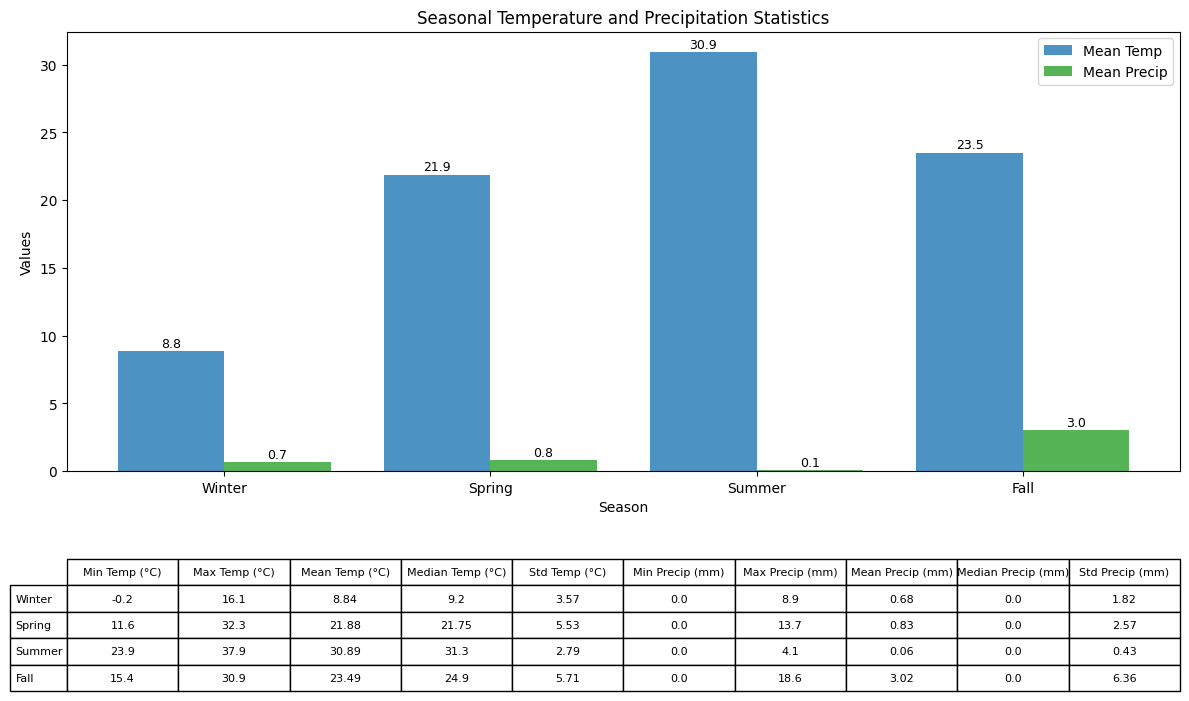

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate  # For pretty-printing tables

# Load the dataset
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
df = pd.read_excel(file_path)

# Check the first few rows of the data to confirm it has loaded correctly
print(df.head())

# Assuming 'date' column is in the format 'YYYY-MM-DD', convert it to datetime
df['date'] = pd.to_datetime(df['date'])

# Define seasonal date ranges
winter = (df['date'] >= '2023-12-21') & (df['date'] <= '2024-03-20')
spring = (df['date'] >= '2024-03-21') & (df['date'] <= '2024-06-20')
summer = (df['date'] >= '2024-06-21') & (df['date'] <= '2024-09-20')
fall = (df['date'] >= '2024-09-21') & (df['date'] <= '2024-12-20')

# Segment the dataset by seasons
seasons = {
    'Winter': df[winter],
    'Spring': df[spring],
    'Summer': df[summer],
    'Fall': df[fall]
}

# Initialize an empty list to store statistics
season_stats = []

# Calculate the statistics for each season
for season, data in seasons.items():
    temp_stats = {
        'Season': season,
        'Min Temp (°C)': data['tavg'].min(),
        'Max Temp (°C)': data['tavg'].max(),
        'Mean Temp (°C)': data['tavg'].mean(),
        'Median Temp (°C)': data['tavg'].median(),
        'Std Temp (°C)': data['tavg'].std(),
        'Min Precip (mm)': data['prcp'].min(),
        'Max Precip (mm)': data['prcp'].max(),
        'Mean Precip (mm)': data['prcp'].mean(),
        'Median Precip (mm)': data['prcp'].median(),
        'Std Precip (mm)': data['prcp'].std(),
    }
    season_stats.append(temp_stats)

# Convert to DataFrame for better display
season_stats_df = pd.DataFrame(season_stats)

# Print the statistics table in a formatted style
print(tabulate(season_stats_df, headers='keys', tablefmt='grid'))

# Plot the bar chart as before
x = np.arange(len(season_stats_df['Season']))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting offset bars
temp_bars = ax.bar(x - width / 2, season_stats_df['Mean Temp (°C)'], width, label='Mean Temp', color='tab:blue', alpha=0.8)
precip_bars = ax.bar(x + width / 2, season_stats_df['Mean Precip (mm)'], width, label='Mean Precip', color='tab:green', alpha=0.8)

# Add labels, title, and legend
ax.set_xlabel('Season')
ax.set_ylabel('Values')
ax.set_title('Seasonal Temperature and Precipitation Statistics')
ax.set_xticks(x)
ax.set_xticklabels(season_stats_df['Season'])
ax.legend()

# Annotate bar values
for bar in temp_bars:
    ax.annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)
for bar in precip_bars:
    ax.annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

# Adding a table to the figure
table_data = season_stats_df.set_index('Season').round(2)  # Format values to 2 decimal points
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  rowLabels=table_data.index,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0, -0.5, 1, 0.3])  # Adjust bbox for positioning

table.auto_set_font_size(False)
table.set_fontsize(8)

fig.tight_layout()
plt.show()



The graph shows two sets of bars:

- **Blue bars** for the **mean temperature** across the four seasons.
- **Green bars** for the **mean precipitation** across the same seasons, plotted on a secondary y-axis.

The graph provides a visual comparison between temperature and precipitation trends for each season.

### Conclusion:
This analysis allows me to understand seasonal variations in Tehran's climate, highlighting patterns such as warmer temperatures in summer and cooler temperatures in winter. Precipitation is typically higher in certain seasons, particularly in spring and fall. The table and graph help visualize these trends and assist in making further inferences about seasonal weather conditions in Tehran.

## **Visualizing Temperature and Precipitation Trends**
In this analysis, I aimed to explore the temperature and precipitation trends over time using various time series plots. To achieve this, I utilized several visualization techniques to examine the data comprehensively. Below are the steps I followed, and the corresponding plots I created:

**Line Plot (Time Series Plot)**

To begin, I created a line plot to visualize the temperature and precipitation trends over time. This plot displays continuous data for both temperature and precipitation, where the x-axis represents the date, and the y-axis shows the values for temperature and precipitation. This plot effectively shows how both variables evolve over the entire period of the dataset.

**Seasonal Subset Plot**

Next, I split the data by seasons to better understand the variations across different times of the year. I plotted separate graphs for each season, highlighting the seasonal differences in temperature and precipitation. This helped me observe the patterns and trends specific to winter, spring, summer, and fall.

**Box Plot**

To better understand the distribution of temperature and precipitation values within each season, I created a box plot. This plot shows the minimum, maximum, median, and quartiles of the temperature and precipitation data for each season. It also helps identify any outliers and compares the spread of values across the seasons.

C:\Users\bmehe\AppData\Local\Temp\ipykernel_83472\900255709.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axs[0].boxplot(seasons_data, labels=['Winter', 'Spring', 'Summer', 'Fall'], patch_artist=True,
C:\Users\bmehe\AppData\Local\Temp\ipykernel_83472\900255709.py:102: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axs[1].boxplot(seasons_no_outliers, labels=['Winter', 'Spring', 'Summer', 'Fall'], patch_artist=True,


Figure saved to E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Seasonal_Temperature_Distribution.pdf


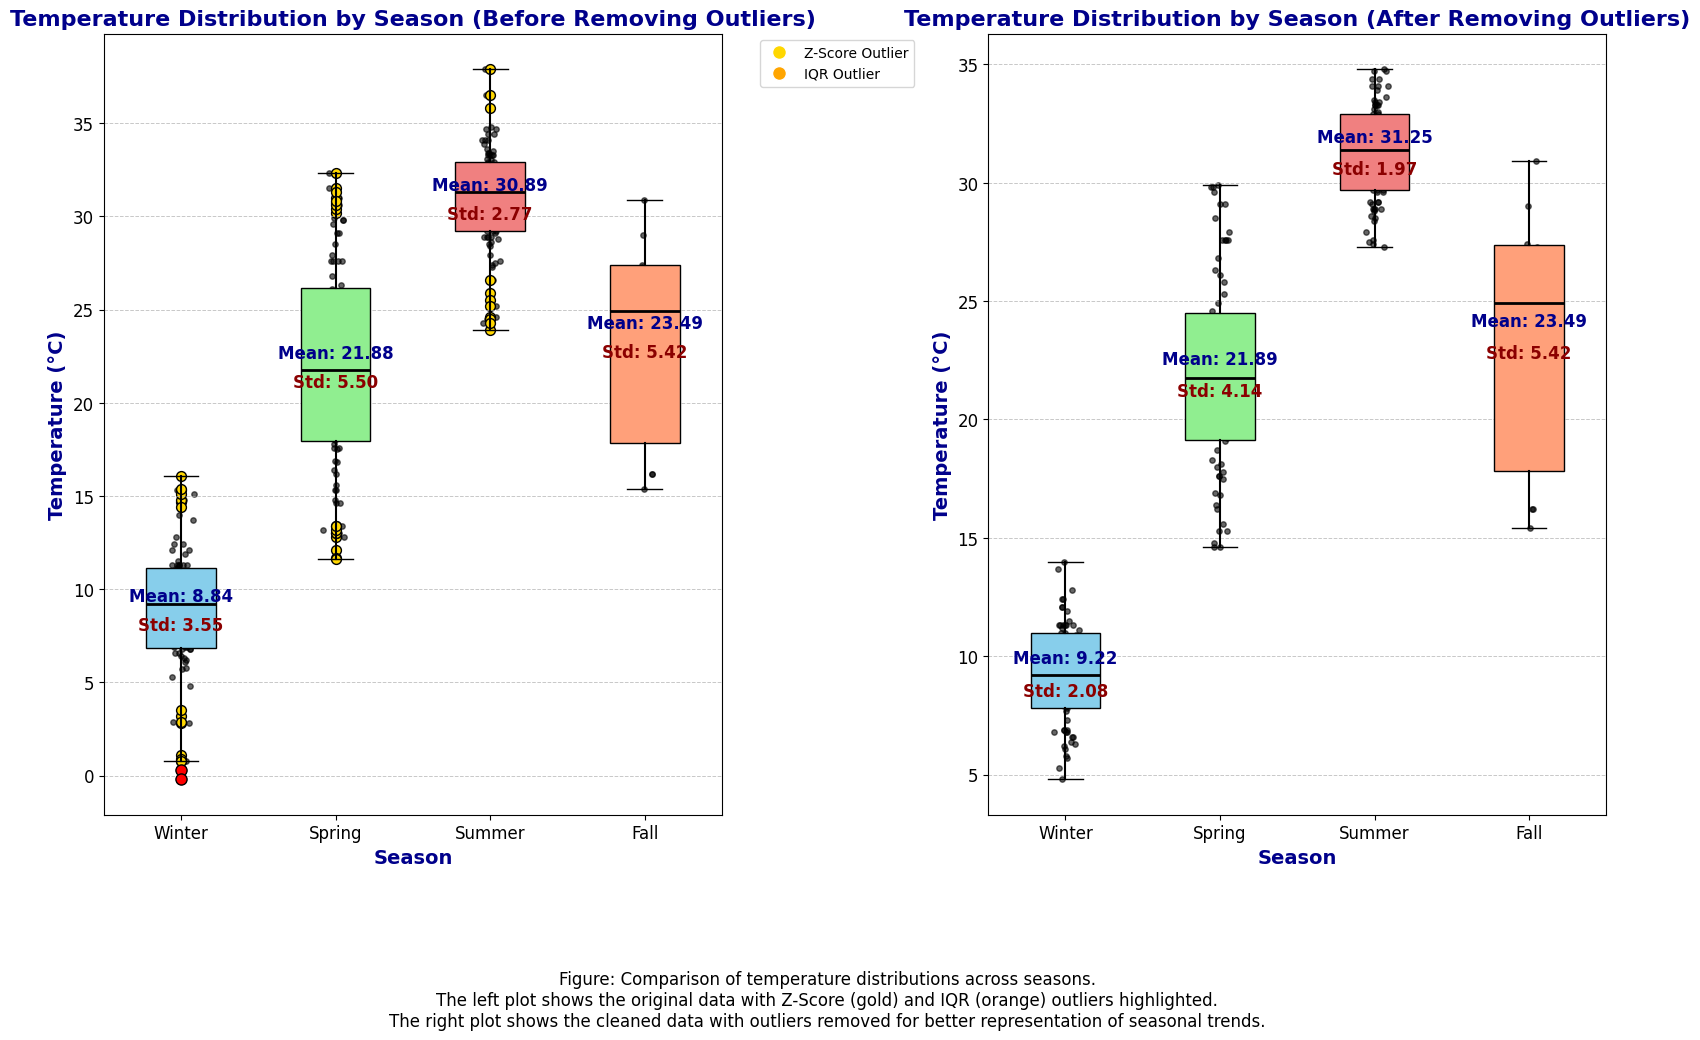

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
df = pd.read_excel(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define seasonal date ranges
winter = (df['date'] >= '2023-12-21') & (df['date'] <= '2024-03-20')
spring = (df['date'] >= '2024-03-21') & (df['date'] <= '2024-06-20')
summer = (df['date'] >= '2024-06-21') & (df['date'] <= '2024-09-20')
fall = (df['date'] >= '2024-09-21') & (df['date'] <= '2024-12-20')

# Segment the dataset by seasons
seasons = {
    'Winter': df[winter]['tavg'],
    'Spring': df[spring]['tavg'],
    'Summer': df[summer]['tavg'],
    'Fall': df[fall]['tavg']
}

# Prepare the data for each season
seasons_data = [seasons['Winter'], seasons['Spring'], seasons['Summer'], seasons['Fall']]

# Define colors for each season
box_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Function to calculate Z-Score and IQR outliers
def detect_outliers(data):
    # Z-Score method (±1.5 standard deviations)
    mean = np.mean(data)
    std = np.std(data)
    z_upper = mean + 1.5 * std
    z_lower = mean - 1.5 * std
    z_outliers = data[(data > z_upper) | (data < z_lower)]
    
    # IQR method
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    iqr_upper = q3 + 1.5 * iqr
    iqr_lower = q1 - 1.5 * iqr
    iqr_outliers = data[(data > iqr_upper) | (data < iqr_lower)]
    
    return z_outliers, iqr_outliers, mean, std

# Create a figure with two subplots (before and after removing outliers)
fig, axs = plt.subplots(1, 2, figsize=(16, 9))

# Plot Before Removing Outliers
axs[0].set_title('Temperature Distribution by Season (Before Removing Outliers)', fontsize=16, fontweight='bold', color='darkblue')
axs[0].set_ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='darkblue')
axs[0].set_xlabel('Season', fontsize=14, fontweight='bold', color='darkblue')

# Create the boxplot (Before Removing Outliers)
bp = axs[0].boxplot(seasons_data, labels=['Winter', 'Spring', 'Summer', 'Fall'], patch_artist=True,
                    boxprops=dict(facecolor='lightgray', color='black'), whiskerprops=dict(color='black', linewidth=1.5),
                    flierprops=dict(markerfacecolor='red', marker='o', markersize=8, linestyle='none'),
                    medianprops=dict(color='black', linewidth=2))

# Assign colors to each boxplot
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

# Add scatter plots and annotate outliers (Before Removing)
for i, season_data in enumerate(seasons_data):
    jitter = np.random.normal(0, 0.03, len(season_data))  # Add slight horizontal jitter
    
    # Scatter individual data points
    axs[0].scatter([i + 1 + jitter_offset for jitter_offset in jitter], season_data,
                   color='black', alpha=0.6, s=15)

    # Detect outliers using both methods
    z_outliers, iqr_outliers, mean, std = detect_outliers(season_data)
    
    # Plot Z-Score outliers
    axs[0].scatter([i + 1] * len(z_outliers), z_outliers, color='gold', edgecolor='black', s=50, label='Z-Score Outlier')

    # Plot IQR outliers (now explicitly set to orange)
    axs[0].scatter([i + 1] * len(iqr_outliers), iqr_outliers, color='orange', edgecolor='black', s=50, label='IQR Outlier')

    # Annotate mean and std
    axs[0].text(i + 1, mean + 0.3, f'Mean: {mean:.2f}', ha='center', va='bottom', color='darkblue', fontsize=12, fontweight='bold')
    axs[0].text(i + 1, mean - 0.3, f'Std: {std:.2f}', ha='center', va='top', color='darkred', fontsize=12, fontweight='bold')

# Plot After Removing Outliers
axs[1].set_title('Temperature Distribution by Season (After Removing Outliers)', fontsize=16, fontweight='bold', color='darkblue')
axs[1].set_ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='darkblue')
axs[1].set_xlabel('Season', fontsize=14, fontweight='bold', color='darkblue')

# Remove outliers and plot
seasons_no_outliers = []
for season_data in seasons_data:
    z_outliers, iqr_outliers, mean, std = detect_outliers(season_data)
    clean_data = season_data[~season_data.isin(z_outliers) & ~season_data.isin(iqr_outliers)]
    seasons_no_outliers.append(clean_data)

# Create the boxplot (After Removing Outliers)
bp = axs[1].boxplot(seasons_no_outliers, labels=['Winter', 'Spring', 'Summer', 'Fall'], patch_artist=True,
                    boxprops=dict(facecolor='lightgray', color='black'), whiskerprops=dict(color='black', linewidth=1.5),
                    flierprops=dict(markerfacecolor='red', marker='o', markersize=8, linestyle='none'),
                    medianprops=dict(color='black', linewidth=2))

# Assign colors to each boxplot
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

# Add scatter plots and annotate statistics (After Removing Outliers)
for i, season_data in enumerate(seasons_no_outliers):
    jitter = np.random.normal(0, 0.03, len(season_data))
    axs[1].scatter([i + 1 + jitter_offset for jitter_offset in jitter], season_data, color='black', alpha=0.6, s=15)
    mean = np.mean(season_data)
    std = np.std(season_data)
    axs[1].text(i + 1, mean + 0.3, f'Mean: {mean:.2f}', ha='center', va='bottom', color='darkblue', fontsize=12, fontweight='bold')
    axs[1].text(i + 1, mean - 0.3, f'Std: {std:.2f}', ha='center', va='top', color='darkred', fontsize=12, fontweight='bold')

# Add a simple legend to the right of the first plot
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=10, label='Z-Score Outlier'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='IQR Outlier')
]
axs[0].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# Add gridlines to both plots
for ax in axs:
    ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add a caption to the plots
caption = ("Figure: Comparison of temperature distributions across seasons.\n"
           "The left plot shows the original data with Z-Score (gold) and IQR (orange) outliers highlighted.\n"
           "The right plot shows the cleaned data with outliers removed for better representation of seasonal trends.")
plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=12, color='black')

# Save the figure as a PDF
save_path = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Seasonal_Temperature_Distribution.pdf'
plt.savefig(save_path, format='pdf', bbox_inches='tight')
print(f"Figure saved to {save_path}")

# Show the plots
plt.tight_layout()
plt.show()



**Heatmap of Monthly or Seasonal Averages**

I also created a heatmap to visualize the monthly or seasonal variations in temperature and precipitation. This plot displayed the average temperature and precipitation values for each month, with color coding to indicate the magnitude of values. It provided a clear and visually appealing way to see seasonal trends across the year.

C:\Users\bmehe\AppData\Local\Temp\ipykernel_83472\3359048883.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  season_matrix = season_matrix.fillna(method='ffill').fillna(method='bfill')


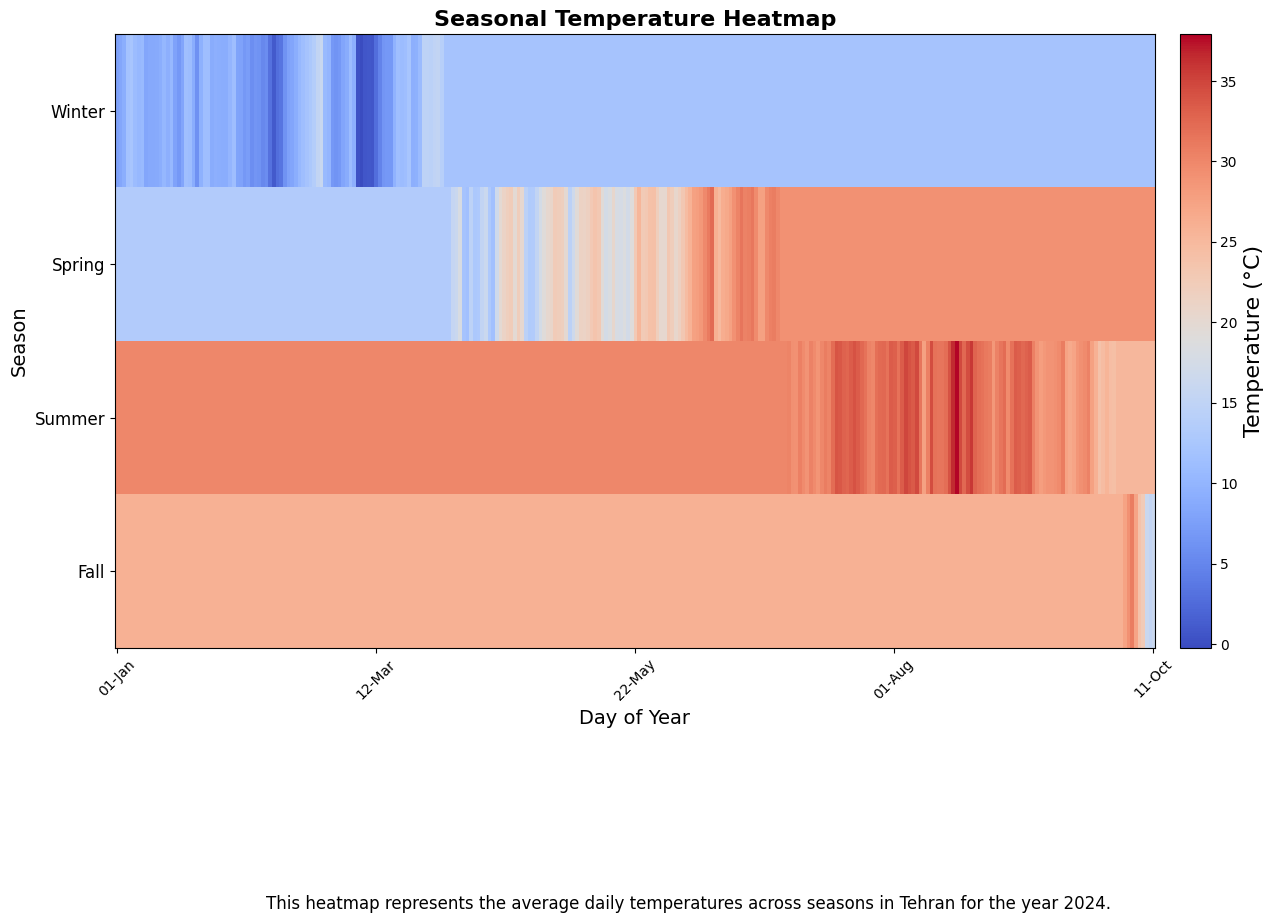

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
df = pd.read_excel(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define seasonal date ranges
winter = (df['date'] >= '2023-12-21') & (df['date'] <= '2024-03-20')
spring = (df['date'] >= '2024-03-21') & (df['date'] <= '2024-06-20')
summer = (df['date'] >= '2024-06-21') & (df['date'] <= '2024-09-20')
fall = (df['date'] >= '2024-09-21') & (df['date'] <= '2024-12-20')

# Segment the dataset by seasons
seasons = {
    'Winter': df[winter],
    'Spring': df[spring],
    'Summer': df[summer],
    'Fall': df[fall]
}

# Prepare the data for each season and ensure consistency in length
resampled_seasons = {}
for season, data in seasons.items():
    resampled_seasons[season] = data.set_index('date').resample('D').mean()['tavg']

# Convert the resampled data to a DataFrame where each season is a column
season_matrix = pd.DataFrame({
    'Winter': resampled_seasons['Winter'],
    'Spring': resampled_seasons['Spring'],
    'Summer': resampled_seasons['Summer'],
    'Fall': resampled_seasons['Fall']
})

# Ensure all seasons have the same length using forward-fill and backward-fill
season_matrix = season_matrix.fillna(method='ffill').fillna(method='bfill')

# Plot the heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(14, 8))

# Create a colormap from blue (cold) to red (warm)
cmap = plt.get_cmap("coolwarm")

# Plot the heatmap without interpolation
cax = ax.imshow(season_matrix.T, cmap=cmap, aspect='auto', interpolation='none')

# Add color bar for temperature scale
cbar = plt.colorbar(cax, ax=ax, label='Temperature (°C)', pad=0.02)
cbar.ax.tick_params(labelsize=10)

# Add labels and title
ax.set_title('Seasonal Temperature Heatmap', fontsize=16, fontweight='bold')
ax.set_xlabel('Day of Year', fontsize=14)
ax.set_ylabel('Season', fontsize=14)

# Set the x-ticks and y-ticks labels
x_ticks = np.linspace(0, len(season_matrix) - 1, 5).astype(int)
x_labels = pd.date_range(start='2024-01-01', periods=len(season_matrix), freq='D').strftime('%d-%b')[x_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, fontsize=10)

ax.set_yticks(np.arange(4))
ax.set_yticklabels(['Winter', 'Spring', 'Summer', 'Fall'], fontsize=12)

# Add a caption below the plot
caption = "This heatmap represents the average daily temperatures across seasons in Tehran for the year 2024."
plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=12, color='black')

# Ensure layout is tight
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to fit caption

# Save the figure as a PDF
output_path = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Seasonal_Temperature_Heatmap.pdf'
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


Conclusion

Through these visualizations, I was able to effectively analyze the temperature and precipitation trends across different seasons, uncover relationships between the two variables, and observe long-term trends by applying smoothing techniques. The various plot types I used, including line plots, box plots, heatmaps provided valuable insights into the data's behavior over time, allowing for a thorough understanding of seasonal patterns and relationships between temperature and precipitation.

 Extreme Weather Events
 
 To investigate extreme weather events, I defined thresholds for temperature and precipitation. Specifically, I used the 90th percentile of the daily average temperature (tavg) to define hot extremes and the 10th percentile for cold extremes. For precipitation, I set a threshold of 50 mm to identify heavy rainfall events. Next, I created flags in the dataset to indicate when each day met the criteria for extreme temperature (high or low) or heavy precipitation. I then grouped the data by month and calculated the total count of extreme events for each month. Finally, I visualized these trends by plotting a stacked bar chart, showing the frequency of extreme weather events (high temperature, low temperature, and heavy precipitation) for each month. This visualization helps to identify seasonal patterns and trends in extreme weather events over time.

<Figure size 1200x700 with 0 Axes>

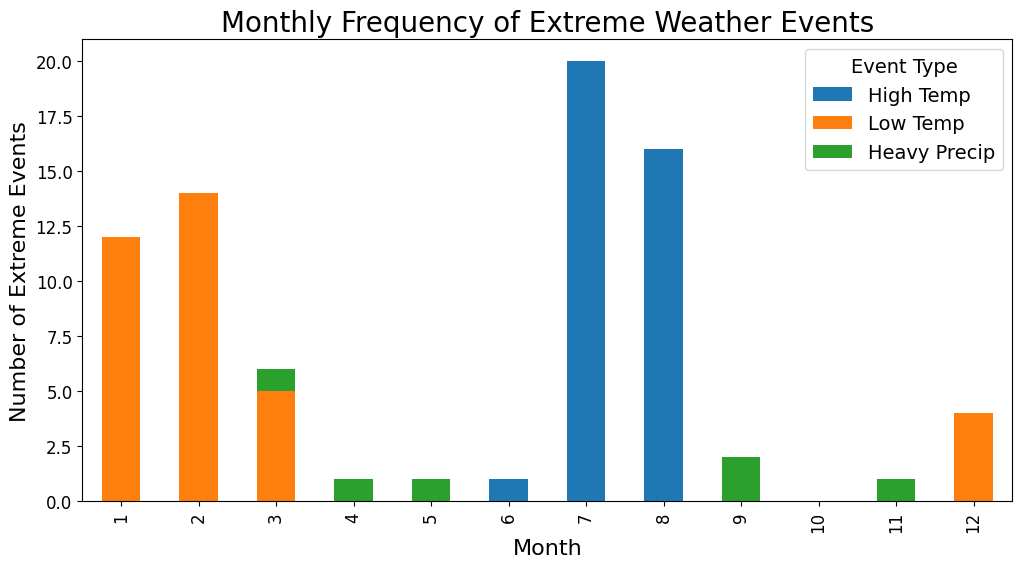

In [ ]:
# Define temperature and precipitation extremes
temp_high_threshold = df['tavg'].quantile(0.9)  # 90th percentile for hot extremes
temp_low_threshold = df['tavg'].quantile(0.1)   # 10th percentile for cold extremes
precip_high_threshold = 10  # 10 mm for heavy rainfall events

# Create flags for extreme events
df['extreme_temp_high'] = df['tavg'] > temp_high_threshold
df['extreme_temp_low'] = df['tavg'] < temp_low_threshold
df['extreme_precip'] = df['prcp'] > precip_high_threshold

# Count extreme events per month or season
monthly_extremes = df.groupby(df['date'].dt.month)[['extreme_temp_high', 'extreme_temp_low', 'extreme_precip']].sum()

# Plot the trends in extreme events
plt.figure(figsize=(12, 7))
monthly_extremes.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Frequency of Extreme Weather Events')
plt.ylabel('Number of Extreme Events')
plt.xlabel('Month')
plt.legend(title="Event Type", labels=["High Temp", "Low Temp", "Heavy Precip"])
plt.show()


date                   0
tavg                   0
tmin                   0
tmax                   0
prcp                   0
snow                 365
wdir                   0
wspd                   0
wpgt                 366
pres                   0
tsun                 366
extreme_temp_high      0
extreme_temp_low       0
extreme_precip         0
dtype: int64


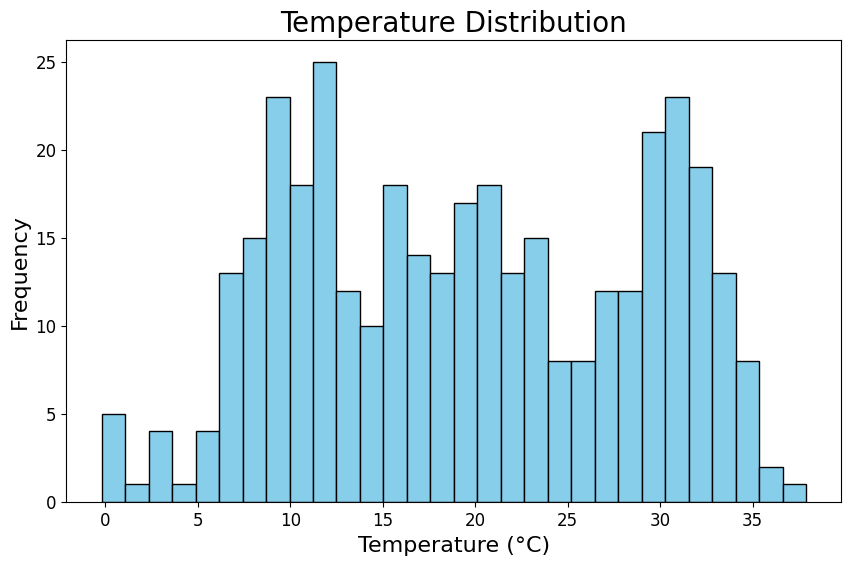

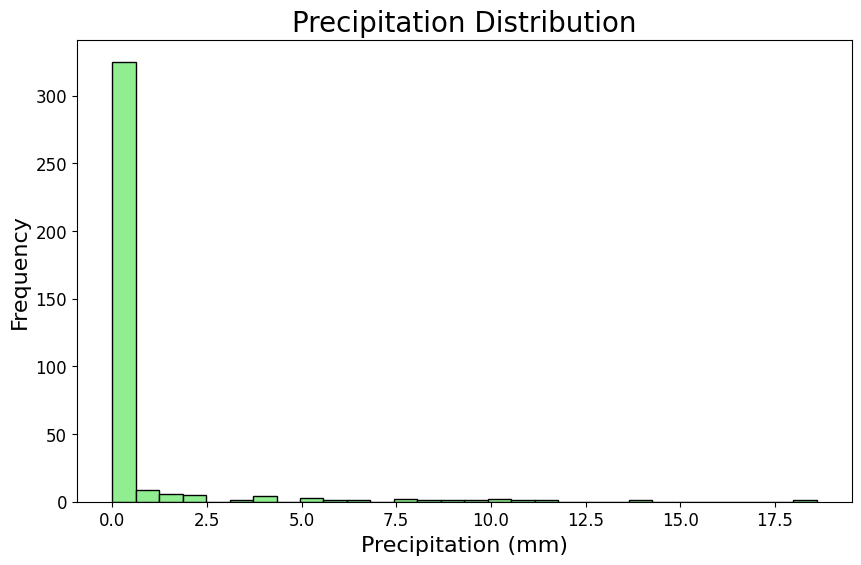

In [ ]:
# Check for missing data
print(df.isnull().sum())

# Drop rows with missing temperature or precipitation data
df_cleaned = df.dropna(subset=['tavg', 'prcp'])

# Re-run the extreme event identification
import matplotlib.pyplot as plt

# Plot the temperature distribution
plt.figure(figsize=(10, 6))
plt.hist(df['tavg'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Plot the precipitation distribution
plt.figure(figsize=(10, 6))
plt.hist(df['prcp'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

